# Exploration of the dataset:
## Source: https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

In [1]:
import os
from matplotlib import pyplot as plt  
import cv2
import random
from src.utils import get_data

In [2]:
# Load dataset
plane = "axial/"

training_dataset = get_data("train/", plane)
test_dataset = get_data("test/", plane)

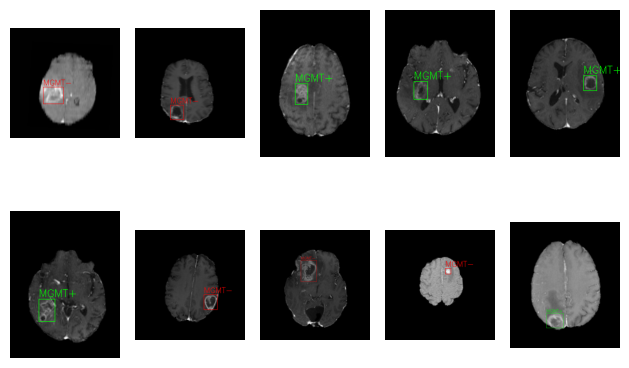

In [ ]:
# Display examples
label_color = {0: (255, 0, 0), 1: (0, 255, 0)}
label_text = {0: "MGMT-", 1: "MGMT+"}

samples = random.sample(training_dataset, 10)

for i, sample in enumerate(samples):
    img_path = sample["image_path"]
    labels = sample["labels"]
    bboxes = sample["bboxes"]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]

    for label, bbox in zip(labels, bboxes):
        x_center, y_center, width, height = bbox

        x_1 = int((x_center - width/2) * img_w)
        y_1 = int((y_center - height/2) * img_h)
        x_2 = int((x_center + width/2) * img_w)
        y_2 = int((y_center + height/2) * img_h)

        color = label_color.get(label,(0, 0, 0))
        text = label_text.get(label, "Unknown" )

        cv2.rectangle(img, (x_1, y_1), (x_2, y_2), color)
        cv2.putText(img, text, (x_1, y_1-4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)

    plt.figure("Display samples")
    plt.subplot(2, 5, i+1) 
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()  
plt.show()

In [4]:
print("Training dataset size : " + str(len(training_dataset)))
print("Test dataset size : " + str(len(test_dataset)))         

Training dataset size : 296
Test dataset size : 75


{'1': 283, '2': 13}
{'0': 123, '1': 186}


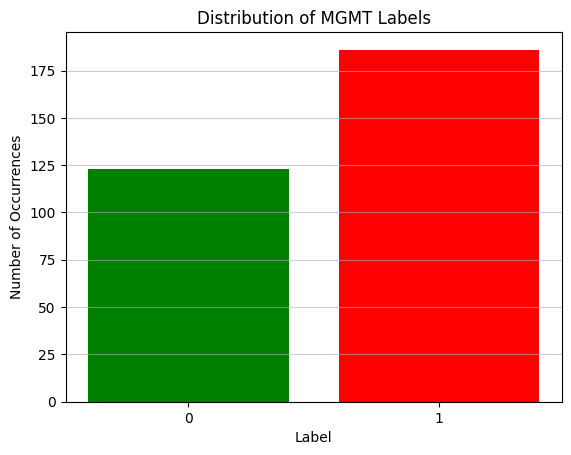

In [7]:
NB_BBOX_PER_IMAGES = {}
MGMT = {"0":0, "1":0}
for sample in training_dataset:
     labels = sample["labels"]
     if str(len(labels)) not in NB_BBOX_PER_IMAGES:
        NB_BBOX_PER_IMAGES[str(len(labels))] = 1
     else:
        NB_BBOX_PER_IMAGES[str(len(labels))] +=1
     for label in labels:
         MGMT[str(label)] +=1
print(NB_BBOX_PER_IMAGES)
print(MGMT)

plt.bar(
    MGMT.keys(),           
    MGMT.values(),         
    color=['green', 'red'] 
)

plt.title("Distribution of MGMT Labels")
plt.xlabel("Label")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.show()

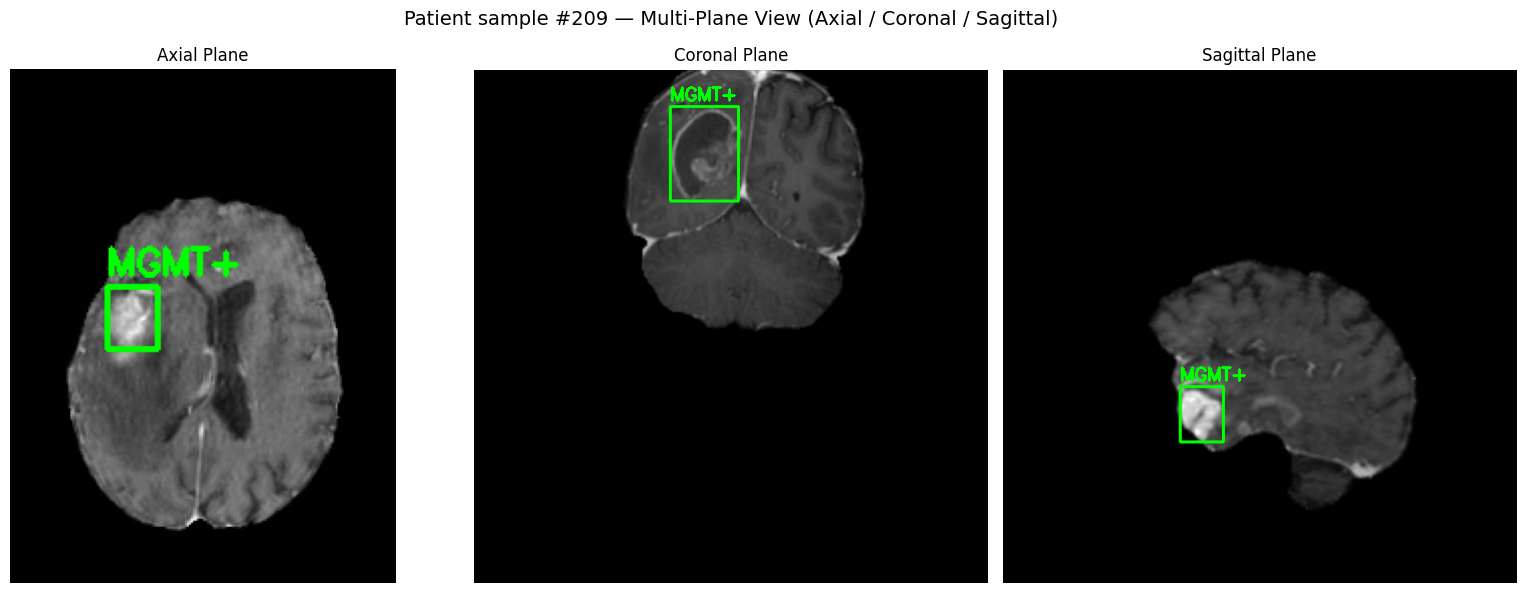

In [13]:
# Display examples for all 3 planes (axial, coronal, sagittal)

planes = ["axial/", "coronal/", "sagittal/"]
plane_titles = ["Axial", "Coronal", "Sagittal"]

datasets = {p: get_data("train/", p) for p in planes}

label_color = {0: (255, 0, 0), 1: (0, 255, 0)}  # MGMT- (red), MGMT+ (green)
label_text = {0: "MGMT-", 1: "MGMT+"}

sample_idx = random.randint(0, len(datasets["axial/"]) - 1)

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle(f"Patient sample #{sample_idx} — Multi-Plane View (Axial / Coronal / Sagittal)", fontsize=14)

for ax, (plane, title) in zip(axes, zip(planes, plane_titles)):
    sample = datasets[plane][sample_idx]
    img_path = sample["image_path"]
    labels = sample["labels"]
    bboxes = sample["bboxes"]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]

    for label, bbox in zip(labels, bboxes):
        x_center, y_center, width, height = bbox
        x1 = int((x_center - width / 2) * img_w)
        y1 = int((y_center - height / 2) * img_h)
        x2 = int((x_center + width / 2) * img_w)
        y2 = int((y_center + height / 2) * img_h)

        color = label_color.get(label, (0, 0, 0))
        text = label_text.get(label, "Unknown")

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, text, (x1, max(20, y1 - 6)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    ax.imshow(img)
    ax.set_title(f"{title} Plane", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()


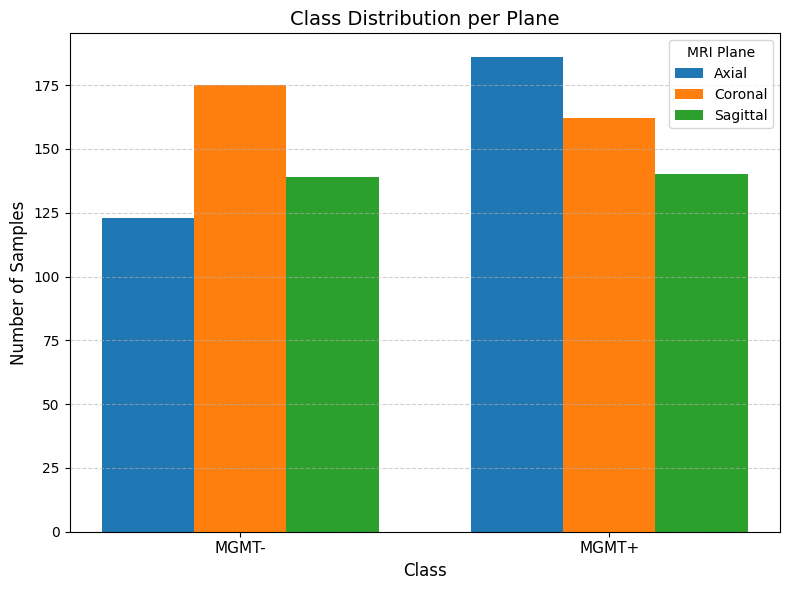

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load datasets
datasets = {p: get_data("train/", p) for p in planes}

# Count labels per plane
class_counts = {plane: Counter() for plane in planes}
for plane in planes:
    for sample in datasets[plane]:
        for label in sample["labels"]:
            class_counts[plane][int(label)] += 1

# Prepare plot data
x = np.arange(len(label_text))  # [0, 1]
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
for i, plane in enumerate(planes):
    counts = [class_counts[plane][cls] for cls in label_text.keys()]
    ax.bar(x + i * width, counts, width, label=plane_titles[i])

# Beautify plot
ax.set_xticks(x + width)
ax.set_xticklabels(label_text.values(), fontsize=11)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Class", fontsize=12)
ax.set_title("Class Distribution per Plane", fontsize=14)
ax.legend(title="MRI Plane")
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
